In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


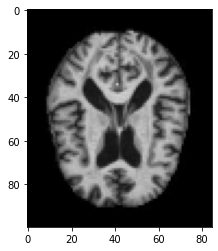

In [2]:
pickle_in = open("data.pickle","rb")
x = pickle.load(pickle_in)
pickle_in = open("classification.pickle","rb")
y = pickle.load(pickle_in)

plt.imshow(x[1],cmap='gray') #x[1] is an array

In [3]:
def build_model():
    
    #Sequential Model creation
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding='same',strides=2,input_shape = (100, 85, 3),activation='relu'))
    
    model.add(Conv2D(64,(3,3),padding='same',strides=2,activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding = 'same'))

    model.add(Conv2D(128,(3,3),padding='valid',strides=2,activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding = 'same'))

    model.add(Conv2D(256,(3,3),padding='valid',strides=2,activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding = 'same'))
    

    
    model.add(Flatten())
    model.add(Dense(100,kernel_regularizer=tf.keras.regularizers.L1(0.02)))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 43, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 22, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0

In [4]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
checkpoint=ModelCheckpoint(r"C:\Users\ASUS\Desktop\our project\SavedModel\CNN{accuracy:.2f}.hdf5", monitor='val_accuracy', mode = 'max', save_best_only = True)
callbacks_list=[checkpoint]

In [5]:
fit = model.fit(x,y,epochs =15,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/15
128/128 [==============================] - 13s 98ms/step - loss: 41.0401 - accuracy: 0.4601 - val_loss: 17.7560 - val_accuracy: 0.5990
Epoch 2/15
128/128 [==============================] - 12s 96ms/step - loss: 16.1654 - accuracy: 0.6221 - val_loss: 12.3822 - val_accuracy: 0.6312
Epoch 3/15
128/128 [==============================] - 12s 91ms/step - loss: 11.3973 - accuracy: 0.6773 - val_loss: 8.9160 - val_accuracy: 0.7180
Epoch 4/15
128/128 [==============================] - 12s 97ms/step - loss: 8.2208 - accuracy: 0.7595 - val_loss: 6.5959 - val_accuracy: 0.7463
Epoch 5/15
128/128 [==============================] - 12s 96ms/step - loss: 5.9776 - accuracy: 0.8270 - val_loss: 4.7768 - val_accuracy: 0.8312
Epoch 6/15
128/128 [==============================] - 12s 93ms/step - loss: 4.2701 - accuracy: 0.9112 - val_loss: 3.5681 - val_accuracy: 0.8185
Epoch 7/15
128/128 [==============================] - 12s 91ms/step - loss: 3.0949 - accuracy: 0.9392 - val_loss: 2.7273 - val_accu

In [8]:
model.save(r'C:\Users\ASUS\Desktop\our project\SavedModel\Final_CNN20%.model')

INFO:tensorflow:Assets written to: C:\Users\ASUS\Desktop\our project\SavedModel\Final_CNN20%.model\assets
